A notebook to process experimental results of ex1_vary_n.py. p(reject) as problem sample size increases.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import kgof.data as data
import lkgof.glo as glo
import lkgof.goftest as gof
import kgof.kernel as kernel
import lkgof.plot as plot
import kgof.util as util

import scipy.stats as stats

In [2]:
plot.set_default_matplotlib_options()

In [3]:
np.set_printoptions(precision=5)

In [4]:
def load_plot_vs_params(fname, xlabel='Burn-in size $t$', show_legend=True, xscale='log'):
    func_xvalues = lambda agg_results: agg_results['bs']
    ex = 4
    def func_title(agg_results):
        repeats, _, n_methods = agg_results['job_results'].shape
        alpha = agg_results['alpha']
        title = '%s. %d trials. $\\alpha$ = %.2g.'%\
            ( agg_results['prob_label'], repeats, alpha)
        return title
    #plt.figure(figsize=(10,5))
    results = plot.plot_prob_reject(
        ex, fname, func_xvalues, xlabel, func_title=func_title)
    
    if xscale is not None:
        plt.xscale(xscale)
    plt.title('')
    plt.gca().legend(loc='best').set_visible(show_legend)
    if show_legend:
        plt.legend(bbox_to_anchor=(1.80, 1.08))
    
    plt.grid(False)
        
    return results


def load_runtime_vs_params(fname, xlabel='Problem parameter', 
                      show_legend=True, xscale='linear', yscale='linear'):
    func_xvalues = lambda agg_results: agg_results['bs']
    ex = 4
    def func_title(agg_results):
        repeats, _, n_methods = agg_results['job_results'].shape
        alpha = agg_results['alpha']
        title = '%s. %d trials. $\\alpha$ = %.2g.'%\
            ( agg_results['prob_label'], repeats, alpha)
        return title
    
    #plt.figure(figsize=(10,6))
    
    results = plot.plot_runtime(ex, fname,  
                                func_xvalues, xlabel=xlabel, func_title=func_title)
    
    plt.title('')
    plt.gca().legend(loc='best').set_visible(show_legend)
    if show_legend:
        plt.legend(bbox_to_anchor=(1.80, 1.05))
    
    plt.grid(False)
    if xscale is not None:
        plt.xscale(xscale)
    if yscale is not None:
        plt.yscale(yscale)
        
    return results



## PPCA

In [6]:
fname = 'ex4-ppca_h0_dx100_dz10_p1_q1+1e-4-me4_rs300_bmi50_bma500_n300_a0.050.p'
results = load_plot_vs_params(fname, show_legend=False, xscale='linear')
plt.hlines(0.05, xmin=0.5, xmax=1.5, linestyles='dashed', label='')
plt.legend(bbox_to_anchor=(1.75, 1.), ncol=1)
# plt.savefig('ppca_legend.pdf',bbox_inches='tight')
# plt.savefig(fname.replace('.p', '_nolegend.pdf', 1), bbox_inches='tight')

ValueError: /nfs/gatsbystor/heishiro/results/lkmod/ex4/ex4-ppca_h0_dx100_dz10_p1_q1+1e-4-me4_rs300_bmi50_bma500_n300_a0.050.p does not exist

MC1 [0.01667 0.01667 0.01333 0.02    0.01667 0.02667 0.01    0.02    0.01
 0.03   ] [0.40428 0.41736 0.40523 0.39291 0.40027 0.41914 0.38777 0.38546 0.39596
 0.39303] [0.28955 0.27171 0.28756 0.27451 0.27485 0.28224 0.27704 0.27548 0.2867
 0.28509]
pval MC1 [0.20221 0.1863  0.19705 0.20354 0.19478 0.18739 0.20635 0.20613 0.20191
 0.20808]
MC10 [0.41    0.43333 0.43    0.44333 0.45    0.44333 0.44333 0.47667 0.44667
 0.44333] [0.39322 0.39471 0.39507 0.395   0.40142 0.39403 0.39417 0.39576 0.39369
 0.39365] [0.14305 0.14091 0.14387 0.13866 0.14251 0.13535 0.143   0.13659 0.14266
 0.13816]
pval MC10 [0.02265 0.02127 0.02226 0.02152 0.02026 0.01997 0.02122 0.02141 0.01964
 0.02078]
MC100 [0.50333 0.52    0.49333 0.54    0.53667 0.49667 0.50333 0.51333 0.51333
 0.50667] [0.39471 0.39324 0.39541 0.39669 0.39605 0.39503 0.39012 0.39167 0.39479
 0.39295] [0.1388  0.13897 0.14232 0.13553 0.13735 0.1348  0.13842 0.13536 0.13785
 0.13716]
pval MC100 [0.01692 0.01707 0.01821 0.01623 0.01615 0.016

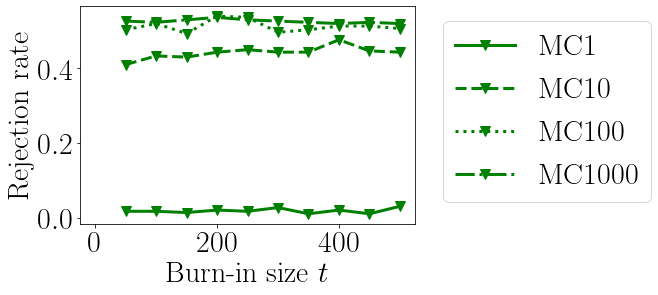

In [10]:
fname = 'ex4-ppca_h1_dx100_dz10_p2_q1-me4_rs300_bmi50_bma500_n300_a0.010.p'
results = load_plot_vs_params(fname, show_legend=False, xscale='linear')
plt.hlines(0.05, xmin=0.5, xmax=1.5, linestyles='dashed', label='')
plt.legend(bbox_to_anchor=(1.75, 1.), ncol=1)
# plt.savefig('ppca_legend.pdf',bbox_inches='tight')
# plt.savefig(fname.replace('.p', '_nolegend.pdf', 1), bbox_inches='tight')

### LDA

MC1 [0.      0.00333 0.00667 0.00667 0.00667 0.00333 0.      0.00333] [-1.2349  -1.36217 -1.95247 -1.7629  -1.75133 -1.46393 -1.61591 -1.52043] [17.81307  4.15786  4.27811  4.76806  4.33905  3.96821  5.18895  4.09095]
pval MC1 [0.5968  0.59632 0.62512 0.62041 0.61901 0.5999  0.61361 0.59843]
MC10 [0.      0.01    0.00333 0.00667 0.00667 0.00333 0.      0.00333] [-1.30051 -1.27429 -1.81987 -1.64726 -1.6742  -1.39606 -1.49393 -1.52037] [17.74484  4.14413  3.71125  4.48015  3.91826  3.89309  5.06436  3.9163 ]
pval MC10 [0.60788 0.59445 0.62546 0.61273 0.62361 0.60049 0.61082 0.6047 ]
MC100 [0.00333 0.00667 0.      0.00333 0.      0.00667 0.      0.     ] [-1.20883 -1.22903 -1.53503 -1.31978 -1.57183 -1.31944 -1.59713 -1.65816] [3.06745 2.87528 3.19294 2.83721 3.24473 3.10304 3.73819 2.96388]
pval MC100 [0.61362 0.63161 0.64475 0.62307 0.65293 0.62311 0.64866 0.64534]
MC1000 [0. 0. 0. 0. 0. 0. 0. 0.] [-1.45449 -1.5626  -1.6453  -1.59557 -1.56918 -1.53294 -1.6159  -1.62623] [1.2229  1.25508

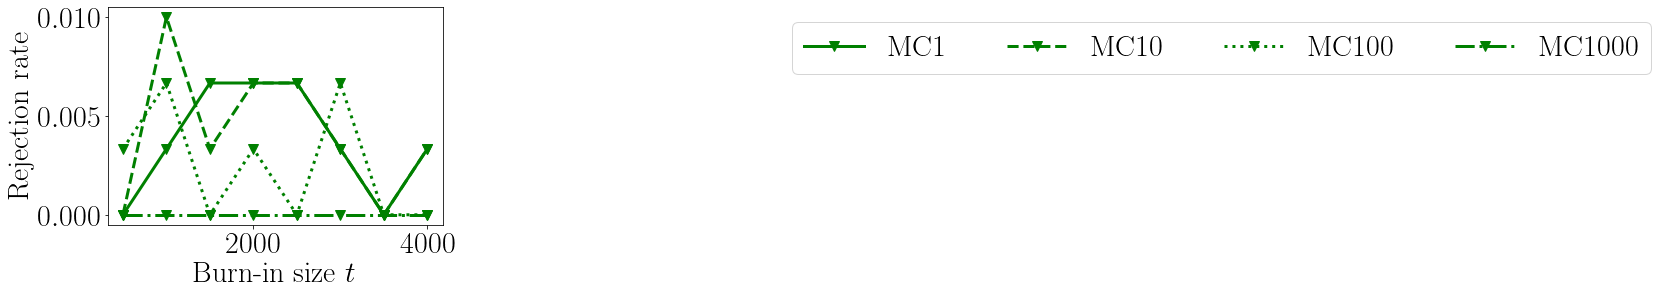

In [19]:
fname = 'ex4-lda_h0_dx50_v1000_t3_p05q1temp1-me4_rs300_bmi500_bma4000_n300_a0.050.p'
results = load_plot_vs_params(fname, show_legend=False, xscale='linear')
#plt.hlines(0.05, xmin=0.5, xmax=1.5, linestyles='dashed', label='Significance level')
plt.legend(bbox_to_anchor=(2,1.), ncol=4)
# plt.savefig('ppca_legend.pdf',bbox_inches='tight')
# plt.savefig(fname.replace('.p', '.pdf', 1), bbox_inches='tight')

MC1 [0.03    0.09333 0.05333 0.04333 0.04    0.07333 0.05333 0.07   ] [1.22495 1.91534 1.45599 1.49977 1.78742 1.94973 1.26867 1.84244] [6.2708  4.05974 3.97895 4.17938 3.93683 4.21933 4.91725 4.05425]
pval MC1 [0.41078 0.37941 0.39546 0.39611 0.37492 0.37122 0.41547 0.36336]
MC10 [0.03    0.1     0.05667 0.05    0.03333 0.07    0.07667 0.06333] [1.17824 1.89343 1.50609 1.5502  1.71128 1.88687 1.36474 1.7933 ] [6.12863 3.99877 3.78515 3.9422  3.76887 4.00064 4.7907  3.9501 ]
pval MC10 [0.40631 0.37486 0.38881 0.38659 0.37671 0.37294 0.40727 0.36272]
MC100 [0.07    0.08333 0.07333 0.06    0.06333 0.09    0.08    0.10667] [1.23347 1.81844 1.50011 1.71984 1.74607 1.81727 1.68868 1.73804] [3.09123 2.76985 4.67165 2.82444 2.8741  3.02289 3.49541 3.06553]
pval MC100 [0.37567 0.33817 0.34346 0.34119 0.34404 0.34056 0.35395 0.34417]
MC1000 [0.23667 0.27333 0.27333 0.26333 0.31667 0.32    0.29333 0.28667] [1.54608 1.61775 1.56659 1.63207 1.67801 1.68812 1.6001  1.57438] [1.09185 1.13973 1.15773

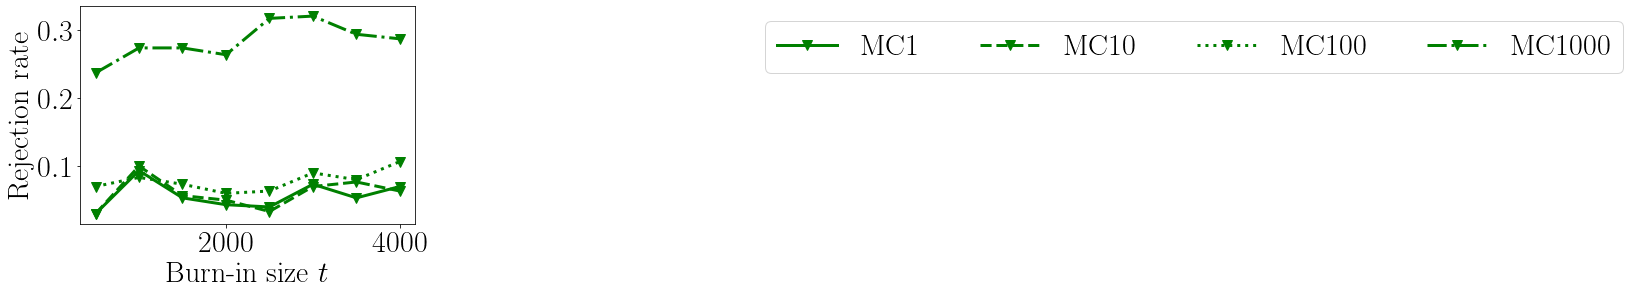

In [21]:
fname = 'ex4-lda_h1_dx50_v1000_t3_p1q05temp1-me4_rs300_bmi500_bma4000_n300_a0.050.p'
results = load_plot_vs_params(fname, show_legend=False, xscale='linear')
#plt.hlines(0.05, xmin=0.5, xmax=1.5, linestyles='dashed', label='Significance level')
plt.legend(bbox_to_anchor=(2,1.), ncol=4)
# plt.savefig('ppca_legend.pdf',bbox_inches='tight')
# plt.savefig(fname.replace('.p', '.pdf', 1), bbox_inches='tight')